In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-prices-dataset


In [16]:
data = pd.read_csv(path + "/Housing.csv")

In [17]:

data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [7]:

data.shape


(545, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64
********************
area
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
3360     1
1700     1
3649     1
2990     1
3620     1
Name: count, Length: 284, dtype: int64
********************
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64
********************
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
********************
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64
********************
mainroad
yes    468
no      77
Name: count, dtype: int64
********************
guestroom
no     448
yes     97
Name: count, dtype: int64
********************
basement
no     354
yes    191
Name: count, dtype: int64
********************
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
*

In [10]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
# Check if there are any duplicate rows
duplicate_rows = data[data.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print("\nDuplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [21]:

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [25]:
target_column = "price"
X = data.drop(target_column, axis=1)
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),  # faster
    "XGBoost": XGBRegressor(n_estimators=50, random_state=42, verbosity=0)     # faster
}

results = {}

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"MAE": mae, "RMSE": rmse}

results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)



Model Performance:
                             MAE          RMSE
Linear Regression  9.159559e+05  1.245949e+06
Random Forest      9.999153e+05  1.398492e+06
XGBoost            1.014191e+06  1.457279e+06


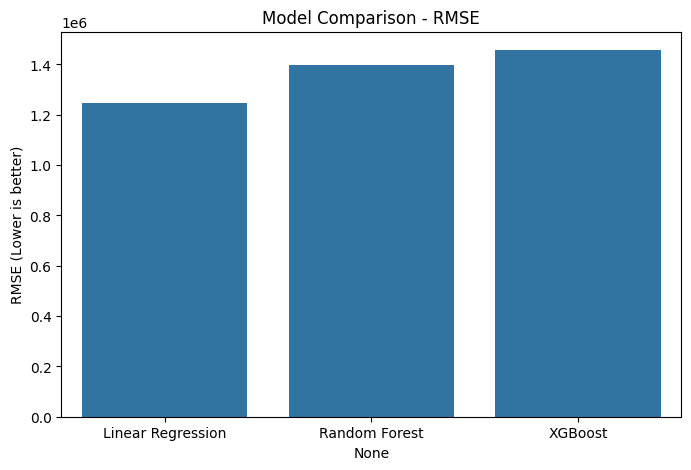

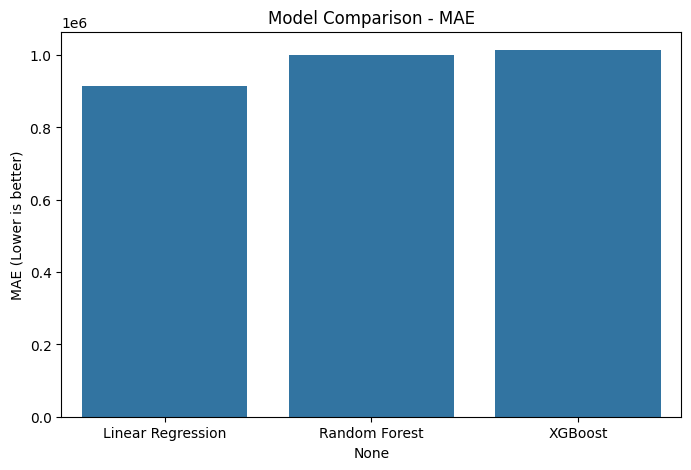

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.ylabel("RMSE (Lower is better)")
plt.title("Model Comparison - RMSE")
plt.show()



plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["MAE"])
plt.ylabel("MAE (Lower is better)")
plt.title("Model Comparison - MAE")
plt.show()

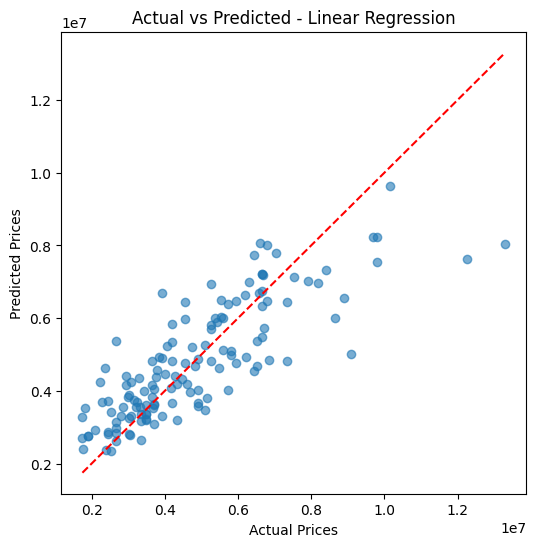

In [36]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)  # scatter plot of actual vs predicted
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)  # reference diagonal line (perfect predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()

In [37]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [46]:
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
y_pred = model.predict(X_test)

In [49]:
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f} | Actual: {y_test.iloc[i]:.2f}")

Predicted: 4501909.00 | Actual: 4060000.00
Predicted: 7260218.50 | Actual: 6650000.00
Predicted: 3959194.75 | Actual: 3710000.00
Predicted: 4311129.00 | Actual: 6440000.00
Predicted: 4233104.50 | Actual: 2800000.00
Predicted: 2769636.50 | Actual: 4900000.00
Predicted: 6277078.50 | Actual: 5250000.00
Predicted: 4728234.00 | Actual: 4543000.00
Predicted: 2981852.50 | Actual: 2450000.00
Predicted: 3087530.50 | Actual: 3353000.00


In [50]:

# --- DYNAMIC INPUT SECTION ---
print("Enter details for prediction:")

# Asking for inputs
area = float(input("Area (sq ft): "))
bedrooms = int(input("Number of bedrooms: "))
bathrooms = int(input("Number of bathrooms: "))
stories = int(input("Number of stories: "))
mainroad = input("Main road (yes/no): ").strip().lower()
guestroom = input("Guestroom (yes/no): ").strip().lower()
basement = input("Basement (yes/no): ").strip().lower()
hotwaterheating = input("Hot water heating (yes/no): ").strip().lower()
airconditioning = input("Air conditioning (yes/no): ").strip().lower()
parking = int(input("Number of parking spaces: "))
prefarea = input("Preferred area (yes/no): ").strip().lower()
furnishingstatus = input("Furnishing status (furnished/semi-furnished/unfurnished): ").strip().lower()

# Convert to numeric encoding same as training
data_dict = {
    "area": area,
    "bedrooms": bedrooms,
    "bathrooms": bathrooms,
    "stories": stories,
    "parking": parking,
    "mainroad_yes": 1 if mainroad == "yes" else 0,
    "guestroom_yes": 1 if guestroom == "yes" else 0,
    "basement_yes": 1 if basement == "yes" else 0,
    "hotwaterheating_yes": 1 if hotwaterheating == "yes" else 0,
    "airconditioning_yes": 1 if airconditioning == "yes" else 0,
    "prefarea_yes": 1 if prefarea == "yes" else 0,
    "furnishingstatus_semi-furnished": 1 if furnishingstatus == "semi-furnished" else 0,
    "furnishingstatus_unfurnished": 1 if furnishingstatus == "unfurnished" else 0
}

# Create DataFrame for prediction
input_df = pd.DataFrame([data_dict])

# Predict price
predicted_price = model.predict(input_df)[0]
print(f"\nPredicted House Price: {predicted_price:.2f}")

Enter details for prediction:
Area (sq ft): 7420
Number of bedrooms: 4
Number of bathrooms: 2
Number of stories: 3
Main road (yes/no): yes
Guestroom (yes/no): no
Basement (yes/no): no
Hot water heating (yes/no): no
Air conditioning (yes/no): yes
Number of parking spaces: 2
Preferred area (yes/no): yes
Furnishing status (furnished/semi-furnished/unfurnished): furnished

Predicted House Price: 9581733.00
